In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (8,6)

In [2]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF : ", dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num of Lags : ", dftest[2])
    print("2. P-Value : ", dftest[3])
    print("2. P-Value : ", dftest[4])

In [190]:
flight_train = pd.read_csv("documents/datasets for data science/flight_delay_prediction/train.csv")
flight_test = pd.read_csv("documents/datasets for data science/flight_delay_prediction/test.csv")
submission = pd.read_csv("documents/datasets for data science/flight_delay_prediction/samplesubmission.csv")

In [12]:
flight_train

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0


In [7]:
flight_train.columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC', 'target'],
      dtype='object')

In [8]:
flight_test

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC
0,test_id_0,2016-05-04,TU 0700,DJE,TUN,2016-05-04 06:40:00,2016-05-04 07.30.00,ATA,TU 32AIMF
1,test_id_1,2016-05-05,TU 0395,TUN,BKO,2016-05-05 15:20:00,2016-05-05 20.05.00,ATA,TU 320IMW
2,test_id_2,2016-05-06,TU 0745,FRA,TUN,2016-05-06 10:00:00,2016-05-06 12.25.00,ATA,TU 32AIMC
3,test_id_3,2016-05-11,TU 0848,BEY,TUN,2016-05-11 09:40:00,2016-05-11 13.10.00,ATA,TU 31BIMO
4,test_id_4,2016-05-11,TU 0635,ORY,MIR,2016-05-11 09:50:00,2016-05-11 12.35.00,ATA,TU 736IOQ
...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,TU 0998,TUN,NCE,2018-09-12 14:15:00,2018-09-12 15.45.00,ATA,TU 320IMV
9329,test_id_9329,2018-09-27,WKL 0000,TUN,TUN,2018-09-27 22:00:00,2018-09-28 01.00.00,SCH,TU 32AIMG
9330,test_id_9330,2018-09-03,UG 1601,SJJ,TUN,2018-09-03 09:20:00,2018-09-03 11.10.00,SCH,TU CR9ISA
9331,test_id_9331,2018-09-15,UG 0008,TUN,DJE,2018-09-15 14:30:00,2018-09-15 15.30.00,SCH,UG AT7LBD


In [9]:
flight_train['STATUS'].value_counts()

ATA    93679
SCH    13242
DEP      467
RTR      294
DEL      151
Name: STATUS, dtype: int64

In [191]:
flight_train.STD = pd.to_datetime(flight_train.STD)
flight_train.DATOP = pd.to_datetime(flight_train.DATOP)

flight_test.STD = pd.to_datetime(flight_test.STD)
flight_test.DATOP = pd.to_datetime(flight_test.DATOP)

In [192]:
flight_train.STA= flight_train.STA.str.replace('.',':')

flight_test.STA= flight_test.STA.str.replace('.',':')

In [193]:
flight_train.STA = pd.to_datetime(flight_train.STA)
flight_test.STA = pd.to_datetime(flight_test.STA)

In [194]:
flight_train['SWT'] = flight_train.STA - flight_train.STD

flight_test['SWT'] = flight_test.STA - flight_test.STD

In [26]:
flight_train

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,SWT
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,0 days 02:25:00
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,0 days 01:50:00
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,0 days 02:35:00
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,0 days 02:50:00
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,0 days 01:20:00
...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02:00:00,SCH,TU 32AIML,0.0,0 days 03:00:00
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09:00:00,SCH,UG AT7AT7,0.0,0 days 01:00:00
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12:50:00,SCH,TU 736IOK,0.0,0 days 07:50:00
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18:45:00,ATA,TU CR9ISA,0.0,0 days 00:45:00


<AxesSubplot:xlabel='DATOP'>

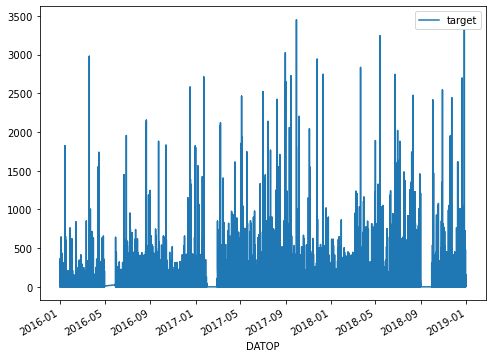

In [187]:
flight_train[['DATOP','target']].set_index('DATOP').plot()

In [224]:
train = flight_en.iloc[:-3000]
test = flight_en.iloc[-3000:]

In [226]:
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

In [227]:
train.set_index('DATOP',inplace=True)
test.set_index('DATOP',inplace=True)

In [228]:
train

,target,ARRSTN,AC,FLTID,DEPSTN,STATUS,SWT_DELAY
DATOP,,,,,,,
2016-01-03,260.0,50.364629,52.669730,24.756000,49.484804,55.655099,145
2016-01-13,20.0,50.364629,35.076844,48.281865,54.550196,55.655099,110
2016-01-16,0.0,89.351595,52.669730,40.137856,44.489723,55.655099,155
2016-01-17,0.0,48.372222,33.682699,36.877907,28.301014,55.655099,170
2016-01-17,22.0,70.114431,58.867697,76.978723,44.489723,55.655099,80
...,...,...,...,...,...,...,...
2018-06-26,0.0,50.364629,31.443978,0.000000,44.489723,0.000000,180
2018-04-13,0.0,50.364629,7.197492,2.684211,2.911647,0.000000,75
2018-06-21,0.0,15.210884,7.197492,3.090909,44.489723,0.000000,50


In [229]:
from statsmodels.tsa.statespace.varmax import VARMAX

var_model = VARMAX(train,enfore_stationarity=True)

In [230]:
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                                    Statespace Model Results                                                    
Dep. Variable:     ['target', 'ARRSTN', 'AC', 'FLTID', 'DEPSTN', 'STATUS', 'SWT_DELAY']   No. Observations:               104833
Model:                                                                           VAR(1)   Log Likelihood            -3786217.388
                                                                            + intercept   AIC                        7572602.776
Date:                                                                  Wed, 31 Aug 2022   BIC                        7573405.826
Time:                                                                          15:07:51   HQIC                       7572845.966
Sample:                                                                               0                                         
                                                                               - 104833          

In [231]:
n_forecast = 3000

predict = fitted_model.get_prediction(start=len(train),end=len(train)+n_forecast-1)

prediction = predict.predicted_mean

In [239]:
prediction.index= test.index

In [240]:
prediction

,target,ARRSTN,AC,FLTID,DEPSTN,STATUS,SWT_DELAY
DATOP,,,,,,,
2018-06-14,-1.517554,44.498629,21.992112,6.038340,38.059502,3.114812,765.815734
2018-06-21,3.624881,44.599595,24.456187,9.019606,38.966347,5.910558,711.432854
2018-10-07,6.907058,44.859076,25.995016,11.482276,39.560441,8.537425,680.280509
2018-07-22,9.598535,45.097759,27.392182,13.754467,40.125185,11.008033,651.912854
2018-03-29,12.035703,45.321876,28.702134,15.883303,40.656256,13.331738,625.294780
...,...,...,...,...,...,...,...
2018-07-05,50.111593,48.863302,49.405168,49.512245,49.051984,50.077716,204.473405
2018-01-13,50.111593,48.863302,49.405168,49.512245,49.051984,50.077716,204.473405
2018-11-07,50.111593,48.863302,49.405168,49.512245,49.051984,50.077716,204.473405


In [236]:
test

,target,ARRSTN,AC,FLTID,DEPSTN,STATUS,SWT_DELAY
DATOP,,,,,,,
2018-06-14,0.0,35.229555,1.197723,2.139086,44.489723,0.000000,60
2018-06-21,0.0,42.422396,56.714108,0.000000,34.521341,0.000000,180
2018-10-07,0.0,39.358809,1.630712,4.275862,44.489723,0.000000,70
2018-07-22,0.0,50.364629,58.978639,0.000000,44.489723,0.000000,251
2018-03-29,0.0,50.364629,35.076844,0.000000,44.489723,0.000000,180
...,...,...,...,...,...,...,...
2018-07-05,0.0,50.364629,61.064774,0.000000,44.489723,0.000000,180
2018-01-13,0.0,50.364629,0.000000,1.289871,28.301014,0.000000,60
2018-11-07,0.0,50.364629,33.682699,0.000000,44.489723,0.000000,470


In [237]:
test_vs_pred

NameError: name 'test_vs_pred' is not defined

In [243]:
flight_test

,ID,DATOP,STD,STA,SWT
0,test_id_0,2016-05-04,2016-05-04 06:40:00,2016-05-04 07:30:00,0 days 00:50:00
1,test_id_1,2016-05-05,2016-05-05 15:20:00,2016-05-05 20:05:00,0 days 04:45:00
2,test_id_2,2016-05-06,2016-05-06 10:00:00,2016-05-06 12:25:00,0 days 02:25:00
3,test_id_3,2016-05-11,2016-05-11 09:40:00,2016-05-11 13:10:00,0 days 03:30:00
4,test_id_4,2016-05-11,2016-05-11 09:50:00,2016-05-11 12:35:00,0 days 02:45:00
...,...,...,...,...,...
9328,test_id_9328,2018-09-12,2018-09-12 14:15:00,2018-09-12 15:45:00,0 days 01:30:00
9329,test_id_9329,2018-09-27,2018-09-27 22:00:00,2018-09-28 01:00:00,0 days 03:00:00
9330,test_id_9330,2018-09-03,2018-09-03 09:20:00,2018-09-03 11:10:00,0 days 01:50:00
9331,test_id_9331,2018-09-15,2018-09-15 14:30:00,2018-09-15 15:30:00,0 days 01:00:00


In [247]:
train

,target,ARRSTN,AC,FLTID,DEPSTN,STATUS,SWT_DELAY
DATOP,,,,,,,
2016-01-03,260.0,50.364629,52.669730,24.756000,49.484804,55.655099,145
2016-01-13,20.0,50.364629,35.076844,48.281865,54.550196,55.655099,110
2016-01-16,0.0,89.351595,52.669730,40.137856,44.489723,55.655099,155
2016-01-17,0.0,48.372222,33.682699,36.877907,28.301014,55.655099,170
2016-01-17,22.0,70.114431,58.867697,76.978723,44.489723,55.655099,80
...,...,...,...,...,...,...,...
2018-06-26,0.0,50.364629,31.443978,0.000000,44.489723,0.000000,180
2018-04-13,0.0,50.364629,7.197492,2.684211,2.911647,0.000000,75
2018-06-21,0.0,15.210884,7.197492,3.090909,44.489723,0.000000,50


In [249]:
import datetime as dt

In [256]:
x = dt.datetime(2016-5-4)

TypeError: function missing required argument 'month' (pos 2)

In [258]:
predict = fitted_model.get_prediction(start=flight_testen.index[0],end=flight_testen.index[-1])

In [259]:
prediction_t = predict.predicted_mean

In [263]:
prediction_t.reset_index(inplace=True)

In [265]:
flight_testen['target'] = prediction_t['target']

flight_testen = flight_testen[['ID','target']]

flight_testen.set_index('ID',inplace=True)

flight_testen.to_csv("uifhiru.csv")

<AxesSubplot:xlabel='DATOP'>

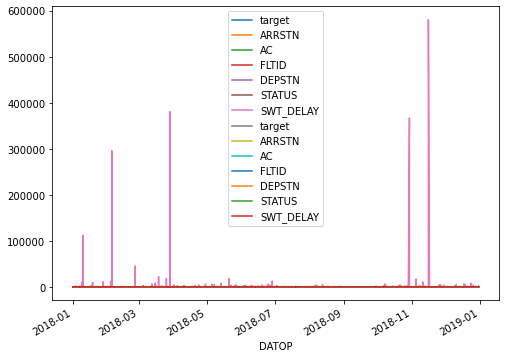

In [241]:
test_vs_pred = pd.concat([test,prediction],axis=1)

test_vs_pred.plot()

In [43]:
flight_train.DEPSTN.value_counts()

TUN    42522
DJE    10252
ORY     6755
MIR     5248
MRS     2845
       ...  
ADB        1
SKG        1
OTP        1
KBP        1
CTA        1
Name: DEPSTN, Length: 132, dtype: int64

In [39]:
flight_train.ARRSTN.value_counts()

TUN    42572
DJE    10198
ORY     6755
MIR     5251
MRS     2845
       ...  
ESB        1
LBV        1
MVB        1
OTP        1
TPS        1
Name: ARRSTN, Length: 128, dtype: int64

In [40]:
flight_train.FLTID.value_counts()

WKL 0000     3105
TU 0613      1284
TU 0397      1184
AOG 0000     1103
TU 0634      1075
             ... 
TU 2177         1
TU 7251         1
TU 2570         1
TU 2561         1
UG 1004         1
Name: FLTID, Length: 1861, dtype: int64

In [41]:
flight_train.AC.value_counts()

TU 320IMU    4724
TU 320IMW    4685
TU 320IMT    4634
TU 320IMR    4601
TU 320IMV    4589
             ... 
BJ 320INH       6
OL 321ABY       5
TU CR9XXX       2
TU 32A32A       2
TU 320320       1
Name: AC, Length: 68, dtype: int64

In [76]:
cat_cols = ['ARRSTN','AC','FLTID','DEPSTN','STATUS']

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(flight_train.drop('target',axis=1),flight_train['target'],random_state=0,test_size=0.3)

In [195]:
from category_encoders import TargetEncoder

target_en = TargetEncoder()
Xtrain_en = target_en.fit_transform(flight_train[cat_cols],flight_train['target'])

# Xtest_en = target_en.transform(X_test[cat_cols])

In [199]:
flight_en

,ID,DATOP,target,SWT,ARRSTN,AC,FLTID,DEPSTN,STATUS
0,train_id_0,2016-01-03,260.0,0 days 02:25:00,50.364629,52.669730,24.756000,49.484804,55.655099
1,train_id_1,2016-01-13,20.0,0 days 01:50:00,50.364629,35.076844,48.281865,54.550196,55.655099
2,train_id_2,2016-01-16,0.0,0 days 02:35:00,89.351595,52.669730,40.137856,44.489723,55.655099
3,train_id_3,2016-01-17,0.0,0 days 02:50:00,48.372222,33.682699,36.877907,28.301014,55.655099
4,train_id_4,2016-01-17,22.0,0 days 01:20:00,70.114431,58.867697,76.978723,44.489723,55.655099
...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,0.0,0 days 03:00:00,50.364629,61.064774,0.000000,44.489723,0.000000
107829,train_id_107829,2018-01-13,0.0,0 days 01:00:00,50.364629,0.000000,1.289871,28.301014,0.000000
107830,train_id_107830,2018-11-07,0.0,0 days 07:50:00,50.364629,33.682699,0.000000,44.489723,0.000000
107831,train_id_107831,2018-01-23,0.0,0 days 00:45:00,35.229555,7.197492,10.383142,44.489723,55.655099


In [211]:
flight_test_ = target_en.transform(flight_test[cat_cols])

In [81]:
Xtrain_en.reset_index()

,index,ARRSTN,AC,FLTID,DEPSTN,STATUS
0,78301,50.287134,35.541395,77.972136,77.236593,55.712995
1,48864,50.287134,61.433103,37.284875,49.574949,55.712995
2,75361,18.563025,7.957568,19.208696,44.370040,47.815476
3,21559,42.240423,61.433103,45.912141,44.370040,55.712995
4,3769,50.287134,56.965961,24.863053,50.328709,55.712995
...,...,...,...,...,...,...
75478,21243,56.923707,56.723490,23.787651,44.370040,55.712995
75479,45891,50.287134,64.860656,37.284875,49.574949,55.712995
75480,42613,70.174497,63.482948,67.332536,44.370040,55.712995
75481,43567,50.287134,54.924071,58.172185,50.666667,55.712995


In [82]:
# X_train.reset_index(inplace=True)
# X_test.reset_index(inplace=True)

X_train.drop(columns=cat_cols,inplace=True)
X_test.drop(columns=cat_cols,inplace=True)

Xtest_en = pd.concat([X_test,Xtest_en],axis=1)
Xtrain_en = pd.concat([X_train,Xtrain_en],axis=1)

In [212]:
flight_test.drop(columns=cat_cols,inplace=True)

flight_testen = pd.concat([flight_test,flight_test_],axis=1)

In [196]:
flight_train.drop(columns=cat_cols,inplace=True)

flight_en = pd.concat([flight_train,Xtrain_en],axis=1)

In [198]:
flight_en.drop(columns=['STD','STA'],inplace=True)

In [84]:
Xtest_en

,ID,DATOP,STD,STA,SWT,ARRSTN,AC,FLTID,DEPSTN,STATUS
69707,train_id_69707,2017-03-22,2017-03-22 22:00:00,2017-03-23 01:00:00,0 days 03:00:00,50.287134,58.151040,0.000000,44.370040,0.000000
51768,train_id_51768,2017-07-09,2017-07-09 08:45:00,2017-07-09 11:25:00,0 days 02:40:00,36.484870,43.379310,37.620690,36.472272,55.712995
98147,train_id_98147,2018-11-09,2018-11-09 12:35:00,2018-11-09 15:55:00,0 days 03:20:00,48.020747,35.362564,17.145161,28.422285,55.712995
38666,train_id_38666,2017-04-25,2017-04-25 02:30:00,2017-04-25 07:30:00,0 days 05:00:00,50.287134,63.482948,55.368421,98.240237,55.712995
34841,train_id_34841,2017-04-15,2017-04-15 03:30:00,2017-04-15 08:30:00,0 days 05:00:00,40.272414,57.005870,101.105262,72.746765,55.712995
...,...,...,...,...,...,...,...,...,...,...
8774,train_id_8774,2016-04-09,2016-04-09 13:20:00,2016-04-09 15:10:00,0 days 01:50:00,56.893939,62.622093,81.839286,44.370040,55.712995
3514,train_id_3514,2016-06-24,2016-06-24 16:20:00,2016-06-24 17:50:00,0 days 01:30:00,50.287134,31.143110,60.419672,57.870130,55.712995
17072,train_id_17072,2016-04-15,2016-04-15 10:10:00,2016-04-15 12:20:00,0 days 02:10:00,50.287134,20.993954,49.262357,51.288321,55.712995
93438,train_id_93438,2018-05-13,2018-05-13 10:25:00,2018-05-13 13:15:00,0 days 02:50:00,77.107143,47.431748,80.413793,28.422285,55.712995


In [202]:
flight_en.drop

,ID,DATOP,target,ARRSTN,AC,FLTID,DEPSTN,STATUS,SWT_DELAY
0,train_id_0,2016-01-03,260.0,50.364629,52.669730,24.756000,49.484804,55.655099,145
1,train_id_1,2016-01-13,20.0,50.364629,35.076844,48.281865,54.550196,55.655099,110
2,train_id_2,2016-01-16,0.0,89.351595,52.669730,40.137856,44.489723,55.655099,155
3,train_id_3,2016-01-17,0.0,48.372222,33.682699,36.877907,28.301014,55.655099,170
4,train_id_4,2016-01-17,22.0,70.114431,58.867697,76.978723,44.489723,55.655099,80
...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,0.0,50.364629,61.064774,0.000000,44.489723,0.000000,180
107829,train_id_107829,2018-01-13,0.0,50.364629,0.000000,1.289871,28.301014,0.000000,60
107830,train_id_107830,2018-11-07,0.0,50.364629,33.682699,0.000000,44.489723,0.000000,470
107831,train_id_107831,2018-01-23,0.0,35.229555,7.197492,10.383142,44.489723,55.655099,45


In [90]:
Xtrain_en['year'] = Xtrain_en.DATOP.dt.year
Xtrain_en['month'] = Xtrain_en.DATOP.dt.month
Xtrain_en['day'] = Xtrain_en.DATOP.dt.day



In [134]:
Xtest_en['DATOP'] = X_test['DATOP']

In [135]:
Xtest_en['year'] = Xtest_en.DATOP.dt.year
Xtest_en['month'] = Xtest_en.DATOP.dt.year
Xtest_en['day'] = Xtest_en.DATOP.dt.year

In [137]:
Xtest_en.drop('DATOP',axis=1,inplace=True)

In [118]:
flight_en['DATOP'] = flight_test['DATOP']

In [119]:
flight_en['year'] = flight_en.DATOP.dt.year
flight_en['month'] = flight_en.DATOP.dt.month
flight_en['day'] = flight_en.DATOP.dt.day

In [94]:
Xtrain_en.drop('DATOP',axis=1,inplace=True)
Xtest_en.drop('DATOP',axis=1,inplace=True)
flight_en.drop('DATOP',axis=1,inplace=True)

In [96]:
Xtrain_en.drop('ID',axis=1,inplace=True)
Xtest_en.drop('ID',axis=1,inplace=True)

In [97]:
Xtrain_en

,STD,STA,SWT,ARRSTN,AC,FLTID,DEPSTN,STATUS,year,month,day
78301,2018-05-24 15:30:00,2018-05-24 17:10:00,0 days 01:40:00,50.287134,35.541395,77.972136,77.236593,55.712995,2018,5,24
48864,2017-12-09 10:30:00,2017-12-09 12:55:00,0 days 02:25:00,50.287134,61.433103,37.284875,49.574949,55.712995,2017,12,9
75361,2018-02-04 09:45:00,2018-02-04 10:30:00,0 days 00:45:00,18.563025,7.957568,19.208696,44.370040,47.815476,2018,2,4
21559,2016-11-11 12:40:00,2016-11-11 14:35:00,0 days 01:55:00,42.240423,61.433103,45.912141,44.370040,55.712995,2016,11,11
3769,2016-02-12 10:30:00,2016-02-12 12:55:00,0 days 02:25:00,50.287134,56.965961,24.863053,50.328709,55.712995,2016,2,12
...,...,...,...,...,...,...,...,...,...,...,...
21243,2016-10-17 06:25:00,2016-10-17 08:00:00,0 days 01:35:00,56.923707,56.723490,23.787651,44.370040,55.712995,2016,10,17
45891,2017-04-12 10:30:00,2017-04-12 12:55:00,0 days 02:25:00,50.287134,64.860656,37.284875,49.574949,55.712995,2017,4,12
42613,2017-06-15 15:05:00,2017-06-15 19:25:00,0 days 04:20:00,70.174497,63.482948,67.332536,44.370040,55.712995,2017,6,15
43567,2017-04-28 17:25:00,2017-04-28 19:25:00,0 days 02:00:00,50.287134,54.924071,58.172185,50.666667,55.712995,2017,4,28


In [200]:
# Xtrain_en["SWT_DELAY"] =  pd.to_timedelta(Xtrain_en.SWT).astype('timedelta64[m]').astype(int)
# Xtest_en["SWT_DELAY"] =  pd.to_timedelta(Xtest_en.SWT).astype('timedelta64[m]').astype(int)
flight_en["SWT_DELAY"] =  pd.to_timedelta(flight_en.SWT).astype('timedelta64[m]').astype(int)

In [213]:
flight_testen["SWT_DELAY"] =  pd.to_timedelta(flight_testen.SWT).astype('timedelta64[m]').astype(int)

In [215]:
flight_testen.drop(columns=['SWT','STD','STA'],inplace=True)
flight_testen

,ID,DATOP,ARRSTN,AC,FLTID,DEPSTN,STATUS,SWT_DELAY
0,test_id_0,2016-05-04,50.364629,56.885276,43.888768,28.301014,55.655099,50
1,test_id_1,2016-05-05,86.353933,61.432444,62.560000,44.489723,55.655099,285
2,test_id_2,2016-05-06,50.364629,34.153488,41.585670,49.341074,55.655099,145
3,test_id_3,2016-05-11,50.364629,35.076844,29.858881,30.625000,55.655099,210
4,test_id_4,2016-05-11,42.422396,39.202474,43.226079,51.763138,55.655099,165
...,...,...,...,...,...,...,...,...
9328,test_id_9328,2018-09-12,44.951526,56.915232,77.057495,44.489723,55.655099,90
9329,test_id_9329,2018-09-27,50.364629,56.714108,0.000000,44.489723,0.000000,180
9330,test_id_9330,2018-09-03,50.364629,7.197492,0.044398,0.044398,0.000000,110
9331,test_id_9331,2018-09-15,35.229555,1.197723,3.726013,44.489723,0.000000,60


In [102]:
Xtrain_en.drop(columns=['STD','STA'],inplace=True)
Xtest_en.drop(columns=['STD','STA'],inplace=True)
flight_en.drop(columns=['STD','STA'],inplace=True)

In [201]:
# Xtrain_en.drop(columns=['SWT'],inplace=True)
# Xtest_en.drop(columns=['SWT'],inplace=True)
flight_en.drop(columns=['SWT'],inplace=True)

In [106]:
Xtrain_en

,ARRSTN,AC,FLTID,DEPSTN,STATUS,year,month,day,SWT_DELAY
78301,50.287134,35.541395,77.972136,77.236593,55.712995,2018,5,24,100
48864,50.287134,61.433103,37.284875,49.574949,55.712995,2017,12,9,145
75361,18.563025,7.957568,19.208696,44.370040,47.815476,2018,2,4,45
21559,42.240423,61.433103,45.912141,44.370040,55.712995,2016,11,11,115
3769,50.287134,56.965961,24.863053,50.328709,55.712995,2016,2,12,145
...,...,...,...,...,...,...,...,...,...
21243,56.923707,56.723490,23.787651,44.370040,55.712995,2016,10,17,95
45891,50.287134,64.860656,37.284875,49.574949,55.712995,2017,4,12,145
42613,70.174497,63.482948,67.332536,44.370040,55.712995,2017,6,15,260
43567,50.287134,54.924071,58.172185,50.666667,55.712995,2017,4,28,120


In [156]:
sns.heatmap(Xtrain_en.corr(),annot=True,cmap=plt.cm.RdYlGn)

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [153]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Xtrain_en = scaler.fit_transform(Xtrain_en)
Xtest_en = scaler.transform(Xtest_en)
# flight_en = scaler.fit_transform(flight_en.drop('ID',axis=1))

In [154]:
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np

catB = CatBoostRegressor()

catB.fit(Xtrain_en,y_train)

y_pred = catB.predict(Xtrain_en)
y_testpred = catB.predict(Xtest_en)


print(f'r2 train : {r2_score(y_train,y_pred)}')
print(f'MAE train : {mean_absolute_error(y_train,y_pred)}')
print()
print(f'r2 train : {r2_score(y_test,y_testpred)}')
print(f'MAE train : {mean_absolute_error(y_test,y_testpred)}')

Learning rate set to 0.081074
0:	learn: 117.3218069	total: 20.3ms	remaining: 20.3s
1:	learn: 116.6023148	total: 37.8ms	remaining: 18.9s
2:	learn: 115.9567235	total: 55ms	remaining: 18.3s
3:	learn: 115.4218484	total: 70.8ms	remaining: 17.6s
4:	learn: 114.9338520	total: 89ms	remaining: 17.7s
5:	learn: 114.5234089	total: 105ms	remaining: 17.4s
6:	learn: 114.1439876	total: 119ms	remaining: 16.9s
7:	learn: 113.8345164	total: 138ms	remaining: 17.1s
8:	learn: 113.5252185	total: 154ms	remaining: 16.9s
9:	learn: 113.2080632	total: 167ms	remaining: 16.5s
10:	learn: 112.9772090	total: 182ms	remaining: 16.4s
11:	learn: 112.7044792	total: 198ms	remaining: 16.3s
12:	learn: 112.5195896	total: 213ms	remaining: 16.2s
13:	learn: 112.3360067	total: 231ms	remaining: 16.3s
14:	learn: 112.1612388	total: 247ms	remaining: 16.2s
15:	learn: 111.9927078	total: 265ms	remaining: 16.3s
16:	learn: 111.8221901	total: 283ms	remaining: 16.3s
17:	learn: 111.6902253	total: 299ms	remaining: 16.3s
18:	learn: 111.5910937	to

164:	learn: 105.9582575	total: 2.55s	remaining: 12.9s
165:	learn: 105.9373183	total: 2.56s	remaining: 12.9s
166:	learn: 105.8883692	total: 2.58s	remaining: 12.9s
167:	learn: 105.8719261	total: 2.6s	remaining: 12.9s
168:	learn: 105.8349113	total: 2.61s	remaining: 12.8s
169:	learn: 105.8257674	total: 2.63s	remaining: 12.8s
170:	learn: 105.8229244	total: 2.64s	remaining: 12.8s
171:	learn: 105.8034234	total: 2.65s	remaining: 12.8s
172:	learn: 105.7671929	total: 2.67s	remaining: 12.8s
173:	learn: 105.7404669	total: 2.68s	remaining: 12.7s
174:	learn: 105.6774836	total: 2.69s	remaining: 12.7s
175:	learn: 105.6682085	total: 2.71s	remaining: 12.7s
176:	learn: 105.6622509	total: 2.73s	remaining: 12.7s
177:	learn: 105.6174309	total: 2.74s	remaining: 12.7s
178:	learn: 105.5941539	total: 2.76s	remaining: 12.6s
179:	learn: 105.5822634	total: 2.77s	remaining: 12.6s
180:	learn: 105.5602757	total: 2.79s	remaining: 12.6s
181:	learn: 105.5232114	total: 2.81s	remaining: 12.6s
182:	learn: 105.4819636	total

318:	learn: 102.3832494	total: 4.96s	remaining: 10.6s
319:	learn: 102.3554340	total: 4.97s	remaining: 10.6s
320:	learn: 102.3475126	total: 4.99s	remaining: 10.5s
321:	learn: 102.3373710	total: 5s	remaining: 10.5s
322:	learn: 102.3261606	total: 5.02s	remaining: 10.5s
323:	learn: 102.2938384	total: 5.04s	remaining: 10.5s
324:	learn: 102.2774058	total: 5.05s	remaining: 10.5s
325:	learn: 102.2619751	total: 5.07s	remaining: 10.5s
326:	learn: 102.2329774	total: 5.09s	remaining: 10.5s
327:	learn: 102.2187308	total: 5.1s	remaining: 10.5s
328:	learn: 102.2048331	total: 5.12s	remaining: 10.4s
329:	learn: 102.1948786	total: 5.14s	remaining: 10.4s
330:	learn: 102.1775243	total: 5.15s	remaining: 10.4s
331:	learn: 102.1618639	total: 5.17s	remaining: 10.4s
332:	learn: 102.1460779	total: 5.18s	remaining: 10.4s
333:	learn: 102.1369449	total: 5.2s	remaining: 10.4s
334:	learn: 102.1293650	total: 5.21s	remaining: 10.4s
335:	learn: 102.1189696	total: 5.23s	remaining: 10.3s
336:	learn: 102.1098767	total: 5.

472:	learn: 100.0344209	total: 7.38s	remaining: 8.22s
473:	learn: 100.0251375	total: 7.39s	remaining: 8.2s
474:	learn: 100.0131016	total: 7.4s	remaining: 8.18s
475:	learn: 100.0004512	total: 7.42s	remaining: 8.16s
476:	learn: 99.9946311	total: 7.43s	remaining: 8.15s
477:	learn: 99.9893200	total: 7.44s	remaining: 8.13s
478:	learn: 99.9588775	total: 7.46s	remaining: 8.11s
479:	learn: 99.9498739	total: 7.47s	remaining: 8.1s
480:	learn: 99.9421399	total: 7.49s	remaining: 8.08s
481:	learn: 99.9326872	total: 7.5s	remaining: 8.06s
482:	learn: 99.9181217	total: 7.52s	remaining: 8.05s
483:	learn: 99.9076070	total: 7.53s	remaining: 8.03s
484:	learn: 99.8987854	total: 7.55s	remaining: 8.02s
485:	learn: 99.8892031	total: 7.57s	remaining: 8s
486:	learn: 99.8759096	total: 7.58s	remaining: 7.99s
487:	learn: 99.8688467	total: 7.6s	remaining: 7.97s
488:	learn: 99.8612028	total: 7.61s	remaining: 7.96s
489:	learn: 99.8460334	total: 7.63s	remaining: 7.94s
490:	learn: 99.8327640	total: 7.65s	remaining: 7.9

637:	learn: 98.1599159	total: 9.96s	remaining: 5.65s
638:	learn: 98.1459367	total: 9.97s	remaining: 5.63s
639:	learn: 98.1341659	total: 9.99s	remaining: 5.62s
640:	learn: 98.1248684	total: 10s	remaining: 5.6s
641:	learn: 98.1180695	total: 10s	remaining: 5.59s
642:	learn: 98.1031292	total: 10s	remaining: 5.57s
643:	learn: 98.0959853	total: 10.1s	remaining: 5.56s
644:	learn: 98.0765536	total: 10.1s	remaining: 5.54s
645:	learn: 98.0693693	total: 10.1s	remaining: 5.53s
646:	learn: 98.0634947	total: 10.1s	remaining: 5.51s
647:	learn: 98.0497069	total: 10.1s	remaining: 5.49s
648:	learn: 98.0302879	total: 10.1s	remaining: 5.48s
649:	learn: 98.0113753	total: 10.1s	remaining: 5.46s
650:	learn: 97.9957514	total: 10.2s	remaining: 5.45s
651:	learn: 97.9830161	total: 10.2s	remaining: 5.43s
652:	learn: 97.9656333	total: 10.2s	remaining: 5.42s
653:	learn: 97.9597734	total: 10.2s	remaining: 5.4s
654:	learn: 97.9504752	total: 10.2s	remaining: 5.39s
655:	learn: 97.9442718	total: 10.2s	remaining: 5.37s
6

800:	learn: 96.4352833	total: 12.5s	remaining: 3.12s
801:	learn: 96.4297967	total: 12.6s	remaining: 3.1s
802:	learn: 96.4234856	total: 12.6s	remaining: 3.08s
803:	learn: 96.4174070	total: 12.6s	remaining: 3.07s
804:	learn: 96.3839780	total: 12.6s	remaining: 3.05s
805:	learn: 96.3806703	total: 12.6s	remaining: 3.04s
806:	learn: 96.3731180	total: 12.6s	remaining: 3.02s
807:	learn: 96.3641474	total: 12.6s	remaining: 3s
808:	learn: 96.3530715	total: 12.7s	remaining: 2.99s
809:	learn: 96.3454147	total: 12.7s	remaining: 2.97s
810:	learn: 96.3407100	total: 12.7s	remaining: 2.96s
811:	learn: 96.3363628	total: 12.7s	remaining: 2.94s
812:	learn: 96.3256469	total: 12.7s	remaining: 2.93s
813:	learn: 96.3187053	total: 12.7s	remaining: 2.91s
814:	learn: 96.3039728	total: 12.8s	remaining: 2.9s
815:	learn: 96.2852225	total: 12.8s	remaining: 2.88s
816:	learn: 96.2811713	total: 12.8s	remaining: 2.87s
817:	learn: 96.2727586	total: 12.8s	remaining: 2.85s
818:	learn: 96.2637514	total: 12.8s	remaining: 2.83

966:	learn: 94.9753835	total: 15.2s	remaining: 517ms
967:	learn: 94.9697770	total: 15.2s	remaining: 502ms
968:	learn: 94.9628726	total: 15.2s	remaining: 486ms
969:	learn: 94.9564647	total: 15.2s	remaining: 470ms
970:	learn: 94.9462765	total: 15.2s	remaining: 455ms
971:	learn: 94.9345337	total: 15.2s	remaining: 439ms
972:	learn: 94.9282869	total: 15.2s	remaining: 423ms
973:	learn: 94.9238280	total: 15.3s	remaining: 407ms
974:	learn: 94.9200851	total: 15.3s	remaining: 392ms
975:	learn: 94.9166608	total: 15.3s	remaining: 376ms
976:	learn: 94.9119968	total: 15.3s	remaining: 360ms
977:	learn: 94.9040208	total: 15.3s	remaining: 345ms
978:	learn: 94.8988402	total: 15.3s	remaining: 329ms
979:	learn: 94.8888653	total: 15.3s	remaining: 313ms
980:	learn: 94.8825896	total: 15.4s	remaining: 298ms
981:	learn: 94.8757204	total: 15.4s	remaining: 282ms
982:	learn: 94.8680937	total: 15.4s	remaining: 266ms
983:	learn: 94.8635479	total: 15.4s	remaining: 251ms
984:	learn: 94.8520581	total: 15.4s	remaining:

In [133]:
Xtest_en.isna().sum()

ARRSTN           0
AC               0
FLTID            0
DEPSTN           0
STATUS           0
year         32350
month        32350
day          32350
SWT_DELAY        0
dtype: int64

In [157]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import numpy as np

catB = AdaBoostRegressor()

catB.fit(Xtrain_en,y_train)

y_pred = catB.predict(Xtrain_en)
y_testpred = catB.predict(Xtest_en)


print(f'r2 train : {r2_score(y_train,y_pred)}')
print(f'MAE train : {mean_absolute_error(y_train,y_pred)}')
print()
print(f'r2 train : {r2_score(y_test,y_testpred)}')
print(f'MAE train : {mean_absolute_error(y_test,y_testpred)}')

r2 train : -0.1468335120166817
MAE train : 68.72297430072194

r2 train : -0.42484427804414304
MAE train : 72.50453133284283


In [120]:
flight_en

,ID,ARRSTN,AC,FLTID,DEPSTN,STATUS,year,month,day,SWT_DELAY,DATOP
0,test_id_0,50.287134,56.965961,45.912141,28.422285,55.712995,2016,5,4,50,2016-05-04
1,test_id_1,86.309711,63.482948,59.944444,44.370040,55.712995,2016,5,5,285,2016-05-05
2,test_id_2,50.287134,39.985915,37.284875,49.574949,55.712995,2016,5,6,145,2016-05-06
3,test_id_3,50.287134,35.541395,30.970395,31.983819,55.712995,2016,5,11,210,2016-05-11
4,test_id_4,44.329888,39.869202,43.130999,51.823221,55.712995,2016,5,11,165,2016-05-11
...,...,...,...,...,...,...,...,...,...,...,...
9328,test_id_9328,39.332256,54.924071,72.993827,44.370040,55.712995,2018,9,12,90,2018-09-12
9329,test_id_9329,50.287134,58.329164,0.000000,44.370040,0.000000,2018,9,27,180,2018-09-27
9330,test_id_9330,50.287134,7.957568,0.326605,0.326605,0.000000,2018,9,3,110,2018-09-03
9331,test_id_9331,36.484870,1.578909,2.453526,44.370040,0.000000,2018,9,15,60,2018-09-15


In [165]:
flight = flight_en.drop(columns=['ID','DATOP','target'])

In [166]:
flight

,ARRSTN,AC,FLTID,DEPSTN,STATUS,year,month,day,SWT_DELAY
0,50.287134,56.965961,45.912141,28.422285,55.712995,2016,5,4,50
1,86.309711,63.482948,59.944444,44.370040,55.712995,2016,5,5,285
2,50.287134,39.985915,37.284875,49.574949,55.712995,2016,5,6,145
3,50.287134,35.541395,30.970395,31.983819,55.712995,2016,5,11,210
4,44.329888,39.869202,43.130999,51.823221,55.712995,2016,5,11,165
...,...,...,...,...,...,...,...,...,...
9328,39.332256,54.924071,72.993827,44.370040,55.712995,2018,9,12,90
9329,50.287134,58.329164,0.000000,44.370040,0.000000,2018,9,27,180
9330,50.287134,7.957568,0.326605,0.326605,0.000000,2018,9,3,110
9331,36.484870,1.578909,2.453526,44.370040,0.000000,2018,9,15,60


In [167]:
y_flight = catB.predict(flight)

In [168]:
y_flight

array([1341.75, 1341.75, 1341.75, ..., 1341.75, 1341.75, 1341.75])

In [124]:
submission

,ID,target
0,test_id_0,2470
1,test_id_1,2944
2,test_id_2,2585
3,test_id_3,3264
4,test_id_4,1369
...,...,...
9328,test_id_9328,2155
9329,test_id_9329,3444
9330,test_id_9330,921
9331,test_id_9331,130


In [125]:
flight_en['target'] = y_flight

In [148]:
flight_submit = flight_en[['ID','target']]

In [149]:
flight_submit.set_index('ID',inplace=True)

In [150]:
flight_submit.to_csv("submission.csv")